# Unsupervised Learning: Clustering

Load (<i>import...</i>) the lib packages:
* **pandas**: Python library used for data analysis and manipulation. It provides DataFrames, Series, data cleaning, transformation, aggregation, and merging.
* **numpy**: Numerical Python is a foundational library for numerical and scientific computing in Python. It supports large, multi-dimensional arrays and matrices, along mathematical functions to operate on these arrays.
* **seaborn**: the data visualization library built on top of Matplotlib. It offers tools for visualizing distributions, relationships between variables, and comparisons across categories, and integrates well with Pandas DataFrames.
* **matplotlib**: the plotting library in Python used for creating static, animated, and interactive visualizations. It enables various types of plots, including line plots, scatter plots, bar charts, histograms, and more.
* **sklearn**: is a popular, open-source machine learning library in Python. Built on NumPy, SciPy, and Matplotlib, it offers a wide range of algorithms for classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
* **ipywidgets**: Jupyter widgets are interactive HTML widgets for Jupyter notebooks and the IPython kernel. They add interactive controls to notebooks, allowing users to explore data and code in a more engaging way.

Load (<i>from...import...</i>) the tools:
* **StandardScaler**: a preprocessing class (also known as Z-score normalization) in the scikit-learn library that standardizes features by removing the mean and scaling to unit variance. The standardization is applied feature-wise. It transforms the data such that each feature has a mean of 0 and a standard deviation of 1.  
* **load_wine**: a built-in function in Python, part of the sklearn.datasets module, is used to load the wine dataset, a classic multi-class classification dataset that contains chemical analysis results of 178 different wines in 13 features.
* **KMeans**: an unsupervised ML algorithm used to partition data points into a predefined number of clusters (k). It minimizes the within-cluster variance, making data points within the same clusters, iteratively assigns data points to the nearest cluster centroid and updates the centroids based on the mean of the assigned data points until convergence.
* **PCA**: principal component analysis is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining the most significant information (variances among datapoints). It identifies principal components, which are orthogonal directions of maximum variance in the data.
* **interact**: Allows Interacting with widgets in Python within environments like Jupyter Notebooks, primarily involves using the ipywidgets library. This library provides a way to create interactive user interface controls directly in the notebook.
* **Sequential**: refers to data structures or programming paradigms where elements or operations are processed in a specific order, one after another, including <i>sequential data types</i>, <i>sequential programming</i>, <i>sequential models</i>, and <i>sequential file access</i>.
* **Input**: This function allows a program to receive data from the user. It pauses the program's execution, displays a prompt (if provided), and waits for the user to type something and press Enter. The function then returns the entered text as a string.
* **Dense**: In context of neural networks, a dense layer, also known as a fully connected layer, is a layer where each neuron is connected to every neuron in the preceding layer. This means that the output of each neuron in the previous layer serves as an input to every neuron in the current layer.
* **Adam**: Adaptive Moment Estimation is an optimization algorithm in ML, particularly in deep learning. It combines the advantages of two other optimization algorithms, **RMSprop** and **momentum**. Adam adapts the learning rate for each parameter individually, making it suitable for a wide range of problems.
* **Keras**: a high-level neural networks API written in Python. It interfacez with various deep learning backends like TensorFlow, JAX, and PyTorch. Keras prioritizes user-friendliness, modularity, and extensibility, allowing for rapid experimentation and easy implementation of neural networks. It simplifies the process of building complex models by providing pre-built layers and functions.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import ipywidgets as widgets
from ipywidgets import interact
from keras.models import Sequential
from keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

## Data preparation

Load the **wine dataset** from Scikit-learn's built-in collection, including features and target labels. This dataset contains information on different (178) chemical properties of wines, which will be useful
for the clustering and and PCA analysis.

In [ ]:
df = load_wine(as_frame=True)
df = df.frame
df = df.drop(columns=['target'])
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**------self note------**

Below, I add code to display the entire dataset in Google Sheets format.

An illustration of the interactive output is provided as <u>...BUS-41204/Unsupervised Learning/wine data sheet.png.</u>

**------end note------**

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1rO0udbY1-onnvgpdX8UFV8GLfrUEPVVe5DmZ6Qh9ZEA/edit#gid=0


**Use StandardScaler to perform Z-score normalization on features**

Before proceeding with the analysis, we scale the data. This step standardizes the range of the features, preventing variables with larger scales from dominating the results.

In [ ]:
scaler = StandardScaler()

features = scaler.fit(df)
features = features.transform(df)

# Convert to pandas Dataframe
scaled_df = pd.DataFrame(features, columns=df.columns)
# Print the scaled data
scaled_df.head()
X = scaled_df.values
# added following code that original code didn't contain
print("\nNumpy array of scaled data:")
print(X)


Numpy array of scaled data:
[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


Add code below to display the normalized data in google sheets.

An illustration of the interactive output is provided as ...<u>BUS-41204/Unsupervised Learning/normalized wine data sheet.png.</u>

In [ ]:
sheet = sheets.InteractiveSheet(df=scaled_df)

https://docs.google.com/spreadsheets/d/1AWscOZEh2G4RqhpiVbQwiXR97zm4230wdsWjUfSObdo/edit#gid=0


## K-Means Clustering

Next, we apply **K-means Clustering** to the scaled data, determining the optimal number of clusters using the elbow method. The elbow method helps identify the point where adding more clusters no longer significantly improves the model’s performance, allowing us to choose the ideal number of clusters for our analysis.

* **wcss = {}**: initializes an empty dictionary called **wcss**, or Within-Cluster Sum of Squares. It stores the WCSS values for different numbers of clusters. The keys of this dictionary is the number of clusters (k), and the values will be the corresponding WCSS.

* **for i in range(1, 11):**: loops through a range of possible cluster numbers, from 1 to 10 (inclusive of 1, exclusive of 11). In each iteration, the variable i represents the current number of clusters.

* **kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)**: Inside the 1-11 loop, a KMeans object is created from the sklearn.cluster module.

  * **n_clusters=i**: This sets the number of clusters for the current K-Means model to the value of i. So, in the i-th iteration, it will try to form cluster up to the i-th clusters.
  * **init="k-means++"**: initializes the centroids. "k-means++" is a smart initialization technique that aims to spread out the initial centroids in a way that is less likely to converge to a suboptimal solution compared to a purely random initialization.
  * **random_state=42**: This sets the random seed for the K-Means algorithm. By setting a fixed random_state, you ensure that the results of running the code are reproducible. The initial placement of centroids in K-Means is random, and setting a seed makes this process deterministic.

* **kmeans.fit(X)**: This line trains the K-Means model on your data X. The algorithm will try to partition the data points in X into i clusters based on their distance to the centroids. There is never Y in clustering dataset.

* **wcss[i] = kmeans.inertia_**: After the K-Means model is fitted, kmeans.inertia_ gives you the sum of squared distances of samples to their closest cluster center. This is the WCSS[i] value for the i-th iteration of i clusters, with i as the key in WCSS dictionary.

* **plt.plot(wcss.keys(), wcss.values(), "gs-")**: This line uses the matplotlib.pyplot library (assumed to be imported as plt) to create a line plot.
  * **wcss.keys()**: Provides the list of number of clusters, 1-10 (the x-axis values).
  * **wcss.values()**: Provides the corresponding WCSS[i] values (the y-axis values).
  * **"gs-"**: This is a format string that specifies how the plot should look:
      * **g**: Green color for the line and markers.
      * **s**: Square markers at each data point.
      * **-**: Solid line connecting the markers.

* **plt.xlabel("Values of 'k'")**: This sets the label for the x-axis of the plot as "Values of 'k'", indicating the number of clusters.

* **plt.ylabel("WCSS")**: This sets the label for the y-axis of the plot as "WCSS", representing the Within-Cluster Sum of Squares.

* **plt.show()**: This command displays the generated plot.


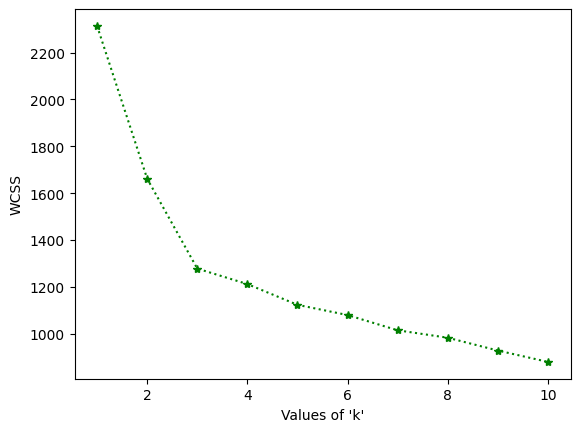

In [ ]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_

plt.plot(wcss.keys(), wcss.values(), "g*:") # green stars and dotted lines
plt.xlabel("Values of 'k'")
plt.ylabel("WCSS")
plt.show()


### Focusing on the Elbow

Based on the elbow method, it appears that three clusters is enough. We will now proceed to apply
K-means clustering with three cluster centers to segment the data.

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

Next, we apply Principal Component Analysis (PCA) to reduce the dimensionality of the data,
extracting the first two principal components. This allows us to visualize the data in two
dimensions while preserving most of the variance.

In [ ]:
pca = PCA(n_components=2)

reduced_X = pd.DataFrame(data=pca.fit_transform(X), columns=["PC1", "PC2"])
centers = pca.transform(kmeans.cluster_centers_)

# Reduced Features
reduced_X.head()


,PC1,PC2
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


Above code printed the PC1-2 values only first five wines. Below code provides all the PC values for all the 178 wines in wine_data.

An illustration of the interactive output is provided as ...<u>BUS-41204/Unsupervised Learning/principal components wine data sheet.png.</u>

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=reduced_X)

https://docs.google.com/spreadsheets/d/1aK7pRAYUydet_8EG1thetiCNARigc9Ul5fHX9uHkgk8/edit#gid=0


### Plotting the wines along 2 Principal Components

We now visualize the first two principal components, with the data points colored according to their cluster assignments. This visualization helps us understand how the clusters are distributed in the PC-reduced two-dimensional space.

**Question**: Why are datapoints colored in more than 3 colors while K=3?

**Answer**: The number of clusters are still 10, not 3, although there are only three centers after k=3. We will need to re-perform the k=3 here to make sure there are just colors.

Number of clusters: 10


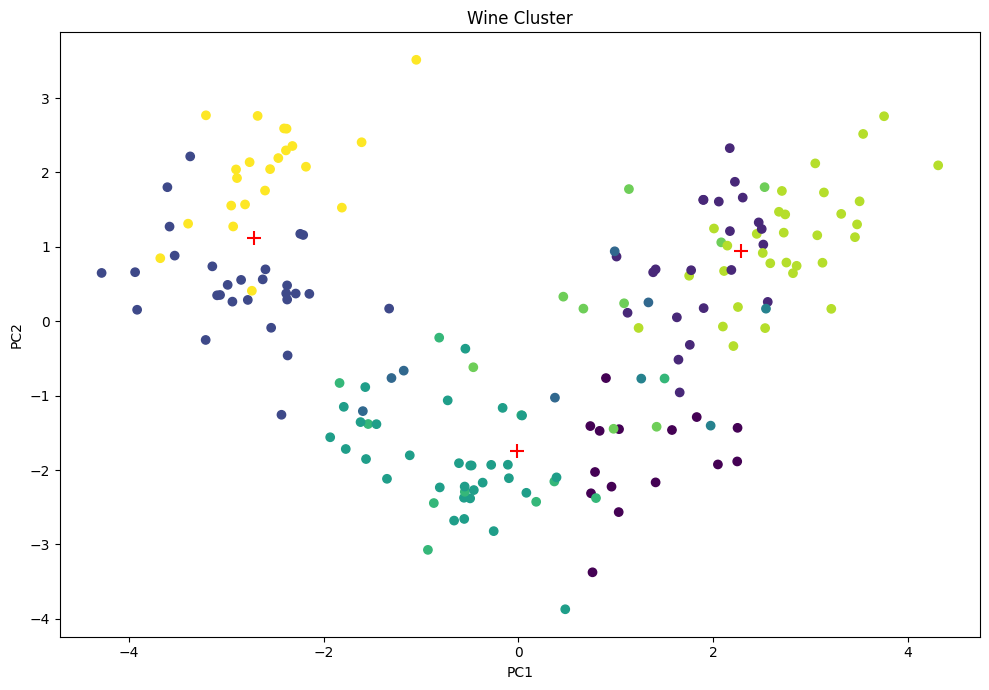

In [ ]:
plt.figure(figsize=(10, 7))

# Scatter plot
plt.scatter(reduced_X["PC1"], reduced_X["PC2"], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker="+", s=100, c="red")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine Cluster")
plt.tight_layout()

# Confirm current cluster number that's not 3
print(f"Number of clusters: {kmeans.n_clusters}")


Now, let's take a look at how each feature loads onto the first two principal components.
This will show us which features have the biggest impact on the data’s variance in the reduced
space.

**------self note------**

From color chart below:
* **PC1**: are most negatively affected by <i>malic_acid</i>, <i>alkalinity_of_ash</i>, and <i>nonflavanoid_phenol</i>, and most positively by <i>flavornoids</i> and <i>total_phenol</i>.
* **PC2**: are most negatively affected by <i>hue</i>, and most positively by <i>color_intensity</i> and <i>alcohol</i>.

**------end note------**

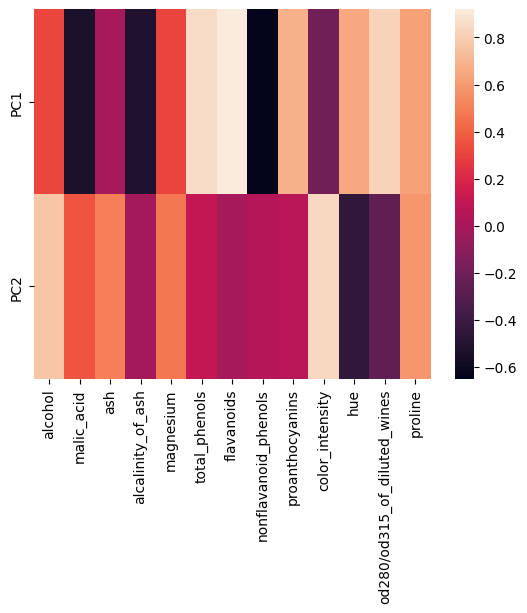

In [ ]:
component_df = pd.DataFrame(
    (pca.components_.T * np.sqrt(pca.explained_variance_)).T,
    index=["PC1", "PC2"],
    columns=df.columns,
)
# Heat map
sns.heatmap(component_df)
plt.show()


### An Interactive Plot of Wine Clusters

The following interactive scatter plot shows the first two principal components of the wine dataset, with data points color-coded by cluster assignment (k=3, finally). You can select different features from the dropdown to visualize how each feature is distributed across these two principal components. This allows us to explore how the features relate to the two principal components.

**------self note------**

This block code contains older version **ipywidgets** that may be not savable onto Github. Github  has a newer version of **nbformat** and **nbconvert** that expect a "state" key to be present. To save this onto Github, either 1) clearout widget output, or 2) add a **"state": {}** key into every widget key.

    # Example Code to add "state" key.
    "widget0": {
    "_model_module": "@jupyter-widgets/controls",
    "_model_name": "IntSliderModel",
    "_view_module": "@jupyter-widgets/controls",
    "_view_name": "IntSliderView",
    "continuous_update": true,
    "description": "Value:",
    "disabled": false,
    "layout": {},
    "max": 100,
    "min": 0,
    "orientation": "horizontal",
    "readout": true,
    "readout_format": "d",
    "step": 1,
    "style": {},
    "state": {} // this is the "state" key to be added //
    },


An illustration of the interactive output is provided as ...<u>BUS-41204/Unsupervised Learning/wine cluster interact output PCA.PNG.</u>

**------end note------**


In [ ]:
# Define the variable among data featueres to be interact with later.
# This choosen variable values will be used to annotate the datapoints
# in the scattere plot
def plot_scatter(variable):
    plt.figure(figsize=(10, 7))

    # Scatter plot with cluster colors
    scatter = plt.scatter(reduced_X["PC1"], reduced_X["PC2"], c=kmeans.labels_, cmap="viridis", s=30, alpha=0.7)

    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=150, c="red", label="Cluster Centers")

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Wine Cluster with Annotated Labels")
    plt.legend()

    # Introduce small random noise to avoid overlap
    np.random.seed(42)  # For consistent results
    x_offsets = np.random.uniform(-0.2, 0.2, len(df))
    y_offsets = np.random.uniform(-0.2, 0.2, len(df))

    # Annotate points with the chosen variable
    for i, txt in enumerate(df[variable]):
        plt.annotate(
            txt,
            (reduced_X["PC1"][i] + x_offsets[i], reduced_X["PC2"][i] + y_offsets[i]),
            fontsize=8,
            ha="center", va="center",
        )

    plt.tight_layout()
    plt.show()

# Create a dropdown widget for selecting the variable
dropdown = widgets.Dropdown(
    options=df.columns,
    value='alcohol',
    description='Variable:',
    disabled=False,
)

# Use interact to create an interactive plot
interact(plot_scatter, variable=dropdown)

# Interactive result of this code block needs to be cleared out
# before saving onto github, because github has later version of
# nbformat and nbconvert that requires explicit "state" key on
# each widget ID.

By default, the dropdown above is set to **alcohol**, which has a strong influence on the second
principal component (PC2). You will notice that higher alcohol values tend to cluster at higher PC2
values. Similarly, malic acid plays a significant role in the first principal component (PC1). If
you select malic_acid from the dropdown, you'll observe that large values of malic acid are
primarily found at lower PC1 values. This reflects how the PCA transformation captures variations in
the dataset, with PC1 and PC2 separating key features into distinct clusters.

**------self note-----**

To plot static scatter plot with albohol values, with un-colored clusters.

**------end note------**

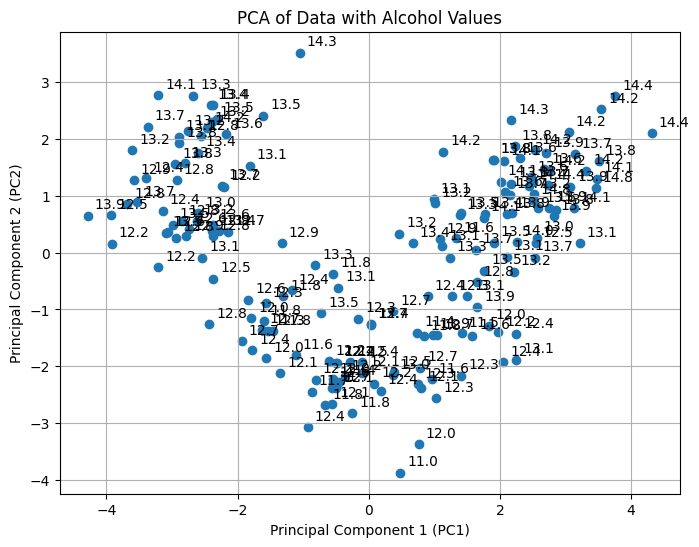

In [ ]:
# Create a DataFrame for the principal components
pca_df = reduced_X

# Add the alcohol values back to the PCA DataFrame for easy access
pca_df['alcohol'] = df['alcohol'].values

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Data with Alcohol Values')

# Annotate each point with the alcohol value
for i, row in pca_df.iterrows():
    plt.annotate(f"{row['alcohol']:.1f}",  # Format alcohol to 1 decimal place
                 (row['PC1'], row['PC2']),
                 textcoords="offset points",
                 xytext=(5, 5),
                 ha='left')

plt.grid(True)
plt.show()

**------self note-----**

To plot static scatter plot with ash values, cluster centers (grey diamonds), and colored clusters.

**------end note------**

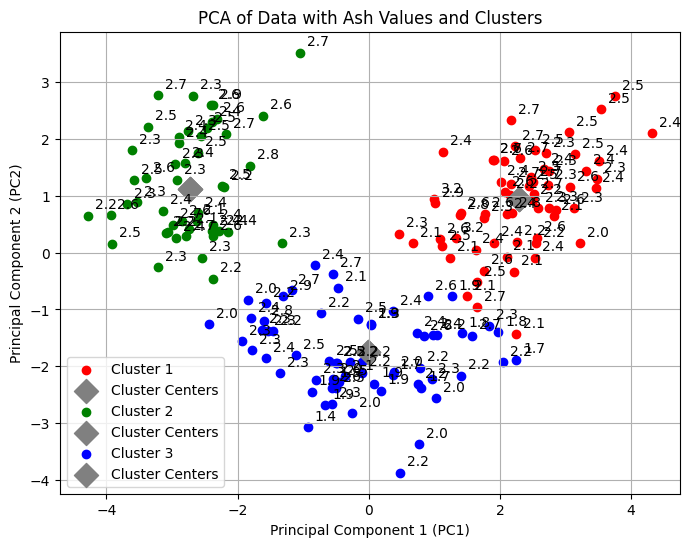

In [ ]:
# Add the ash values back to the PCA DataFrame for easy access
pca_df['ash'] = df['ash'].values

# Perform K-Means clustering (assuming you want 3 clusters)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Add cluster labels to the PCA DataFrame
pca_df['cluster'] = cluster_labels

# Define colors for the clusters
colors = ['red', 'green', 'blue']  # You can choose different colors

# Create the scatter plot with colors
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_data = pca_df[pca_df['cluster'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], color=colors[i], label=f'Cluster {i+1}')

# Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], marker="D", s=150, c="grey", label="Cluster Centers")

# Annotate each point with the ash value
for i, row in pca_df.iterrows():
    plt.annotate(f"{row['ash']:.1f}",
                 (row['PC1'], row['PC2']),
                 textcoords="offset points",
                 xytext=(5, 5),
                 ha='left')

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Data with Ash Values and Clusters')
plt.legend()
plt.grid(True)
plt.show()

**Question**: When replacing alcohol with ash, return error:

**Answer**: That's because **pca_df** has no ash column; you need to add ask values in. Another way is **concate** the datasets along rows.

    pd.concat([pca_df, df], axis=0, ignore_index=True)

## AutoEncoders for PCA

After exploring the linear dimensionality reduction technique PCA, we now turn to
**Autoencoders** (**AEs**), a neural network-based approach that generalizes PCA.
We begin with the **linear Autoencoder**, which, when trained with a mean squared error (MSE) loss and linear activation, effectively learns principal components, much like PCA.

However, real-world data often exhibits nonlinear structures that PCA cannot capture. This is where **nonlinear Autoencoders** come in. By introducing activation functions (e.g., sigmoid, relu), AEs can
learn complex, hierarchical representations that go beyond simple linear projections.

We now first look at a **linear** AE. A linear AE uses linear activation functions (line 7 and 9) as well as the MSE as a loss function (line 12).

### Linear AutoEncoder

**------self note------**

In the plot AE1-2, linear encoder can distinguish nicely the three clusters, with each cluster in its distinct color and very few overlapping. 70-80% of learning loss are reduced in first 50 epochs during Linear Encoder.

**------end note------**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94 (376.00 B)

 Trainable params: 94 (376.00 B)

 Non-trainable params: 0 (0.00 B)

None


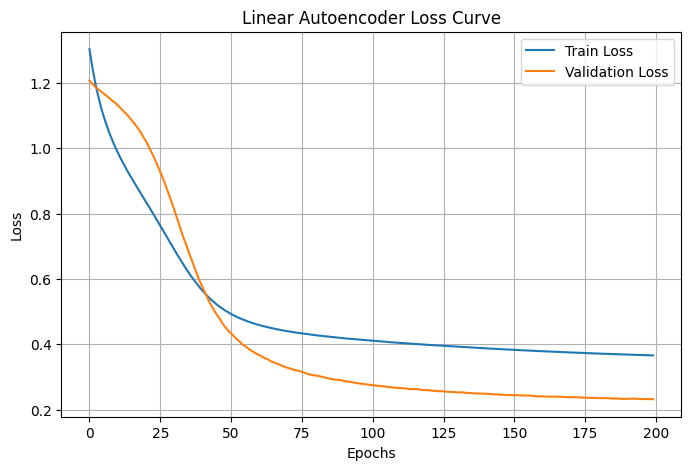

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


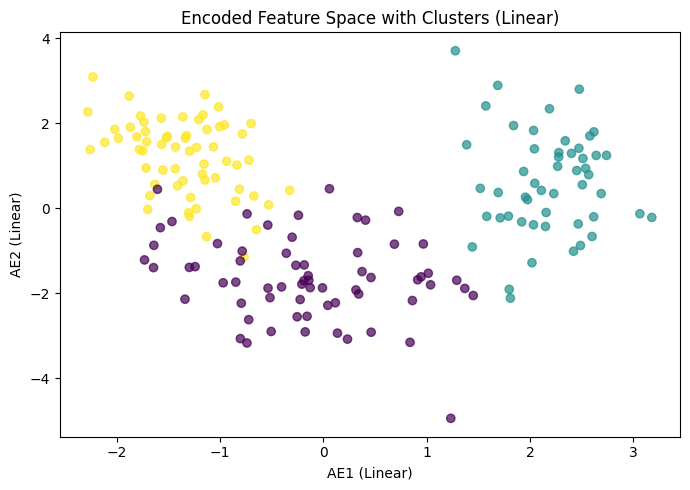

In [ ]:
# Define input dimensions
input_dim_linear = X.shape[1]
encoding_dim_linear = 3

# Define the autoencoder using Sequential API
autoencoder_linear = Sequential([
    Dense(encoding_dim_linear, activation='linear', input_shape=(input_dim_linear,)),  # Encoder
    Dense(input_dim_linear, activation='linear')  # Decoder
])

# Compile the model
autoencoder_linear.compile(optimizer='adam', loss='mse')

# Model summary
print(autoencoder_linear.summary())

history_linear = autoencoder_linear.fit(X, X,
                epochs=200,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose=0,)

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history_linear.history['loss'], label='Train Loss')
plt.plot(history_linear.history['val_loss'], label='Validation Loss')
plt.title('Linear Autoencoder Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Extract encoded features (encoder part)
encoder_linear = Sequential([
    autoencoder_linear.layers[0]  # Extract only the encoder layer
])

encoded_data_linear = encoder_linear.predict(X)

# Scatter plot of encoded data
plt.figure(figsize=(7, 5))
plt.scatter(encoded_data_linear[:, 0], encoded_data_linear[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.xlabel("AE1 (Linear)")
plt.ylabel("AE2 (Linear)")
plt.title("Encoded Feature Space with Clusters (Linear)")
plt.tight_layout()
plt.show()



**------self note------**

**Explaining the Encoder Layers**

* **dense**......**(none, 3)**......**42**: there are 3 **neurons** in this dense encoded layer, each neuron is connected to all of the 13 input features. And each of the 3 dense neurons has a bias. Therefore, there are a total of 13*3 + 3 = 42 parameters to be trained.

* **dense-1**......**(none, 13)**......**52**: there are 13 **neurons** in this dense-1 encoded layer that each is connected to the 3 **dense** neurons. and each of the 13 neurons has a bias. Therefore, there are a total of 3*13 + 13 = 52 parameters to be trained.

* **Total/Trainable params: 96 (376.00 B)** there are 42+52=96 parameters, all trainable. Each parameter takes 4 bytes. Total 4*94=376 bytes are taken.

**------end note------**


### Non-Linear AutoEncoder

Now we do the same but this time with **nonlinear** activation functions (sigmoid).

**------self note------**

In the plot AE1-2, non-linear encoder can distinguish not well the three clusters, with some datapoints plotted outside its cluster zones. Non-linear encoder needs more than 100 epochs to reduce 70-80% of its learning loss, comparing with 50 epochs for linear encoder.

**Non-linear encoder takes more epochs to reach to effecacy**.

**------end note------**

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 13)             │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94 (376.00 B)

 Trainable params: 94 (376.00 B)

 Non-trainable params: 0 (0.00 B)

None


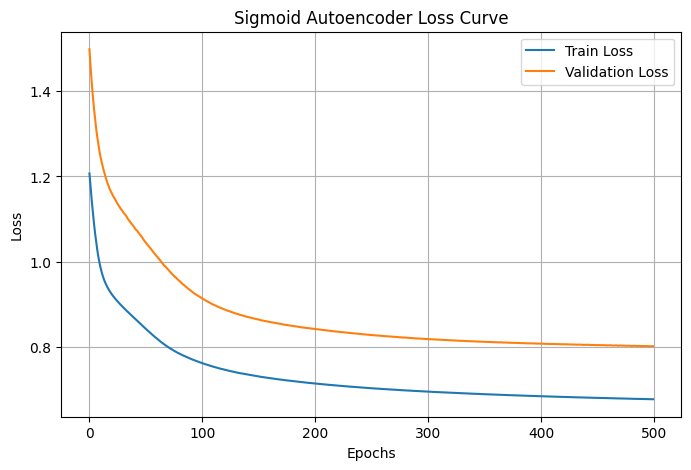

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


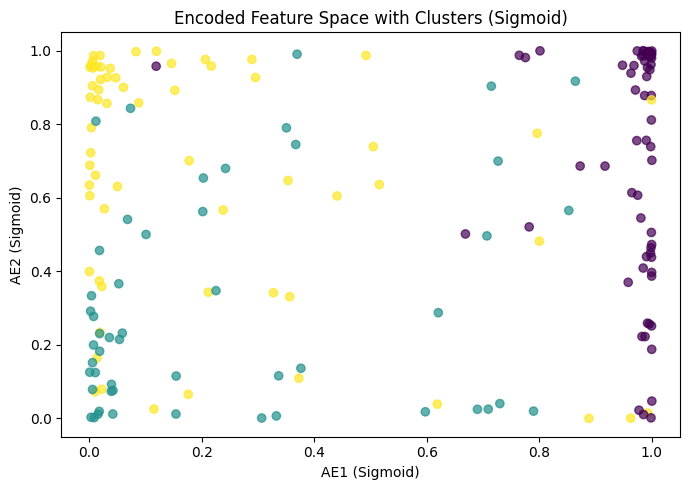

In [ ]:
# Define input dimensions
input_dim_sigmoid = X.shape[1]
encoding_dim_sigmoid = 3

# Autoencoder model with sigmoid activation
autoencoder_sigmoid = Sequential([
    Dense(encoding_dim_sigmoid, activation='sigmoid', input_shape=(input_dim_sigmoid,)),  # Encoder
    Dense(input_dim_sigmoid, activation='sigmoid')  # Decoder
])


# Increase the learning rate (e.g., 0.01)
higher_lr = 0.005
optimizer_high_lr = Adam(learning_rate=higher_lr)
autoencoder_sigmoid.compile(optimizer=optimizer_high_lr, loss='mse')

# Model summary
print(autoencoder_sigmoid.summary())


history_sigmoid = autoencoder_sigmoid.fit(X, X,
                epochs=500,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose=0,)

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history_sigmoid.history['loss'], label='Train Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss')
plt.title('Sigmoid Autoencoder Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Encoder model to extract encoded representations
encoder_sigmoid = Sequential([
    autoencoder_sigmoid.layers[0]  # Extract only the encoder layer
])
encoded_data_sigmoid = encoder_sigmoid.predict(X)

# Scatter plot of encoded data
plt.figure(figsize=(7, 5))
plt.scatter(encoded_data_sigmoid[:, 0], encoded_data_sigmoid[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.xlabel("AE1 (Sigmoid)")
plt.ylabel("AE2 (Sigmoid)")
plt.title("Encoded Feature Space with Clusters (Sigmoid)")
plt.tight_layout()
plt.show()
